<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno: Felipe Jorquera Díaz


### **Link de repositorio de GitHub:** `https://github.com/felipejorqueradiaz/MDS7202-Laboratorios`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
#!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# UMAP
#!pip install umap-learn

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [3]:
#Reemplazamos los datos por 1 y los nans por 0
df_players['National_Position'] = np.where(df_players['National_Position'].isna(), 0 , 1)

In [4]:
print(
    f"Cantidad de Seleccionados (1): {df_players['National_Position'].sum()}"
)

print(
    f"Cantidad de No Seleccionados (0): {(df_players['National_Position']-1).sum()*-1}"
)

Cantidad de Seleccionados (1): 1075
Cantidad de No Seleccionados (0): 16513


### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

* Las variables *Name* y *Nacionalidad* no se considerarán por su naturaleza y dispersión.
* La variable *Club position* es similar a *National Position*, solo que ahora solo 1 persona no tiene equipo. Por alta dispersión no se considera.

In [5]:
preprocessing = ColumnTransformer(
    transformers = [
        ('MinMaxScaler', MinMaxScaler(), [
            'Age'
        ]),
        
        ('OneHotEncoder', OneHotEncoder(), [
            'Preffered_Foot', 'Work_Rate'
        ]),
        
        ('StandardScaler', StandardScaler(), [
            'Height', 'Weight', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking',
            'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
            'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina',
            'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots',
            'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'
        ])
    ]
)

In [6]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
pipe1 = Pipeline(steps = [
    ('prepro', preprocessing),
    ('model', LinearSVC())
])

pipe2 = Pipeline(steps = [
    ('prepro', preprocessing),
    ('model', KNeighborsClassifier())
])

pipe3 = Pipeline(steps = [
    ('prepro', preprocessing),
    ('model', RandomForestClassifier())
])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df_players.drop(['Name', 'Nationality', 'National_Position', 'Club_Position'], axis=1),
    df_players['National_Position'],
    shuffle = True,
    test_size = 0.2,
    random_state = 0
)

pipelines = {'LinearSVC': pipe1,
            'KNC': pipe2,
            'RF': pipe3}

for name, model in pipelines.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores = classification_report(y_test, y_pred)
    print(f'Para el modelo {name} el performance es el siguiente:\n',scores,'\n\n')

C:\Users\Felipe\.julia\conda\3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\Felipe\.julia\conda\3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\.julia\conda\3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\.julia\conda\3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

Para el modelo LinearSVC el performance es el siguiente:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3304
           1       0.00      0.00      0.00       214

    accuracy                           0.94      3518
   macro avg       0.47      0.50      0.48      3518
weighted avg       0.88      0.94      0.91      3518
 


Para el modelo KNC el performance es el siguiente:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      3304
           1       0.29      0.06      0.09       214

    accuracy                           0.93      3518
   macro avg       0.62      0.52      0.53      3518
weighted avg       0.90      0.93      0.91      3518
 


Para el modelo RF el performance es el siguiente:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3304
           1       0.45      0.06      0.11       214

    accuracy   

Los resultados no son muy buenos. La precision es *decente* en el Random Forest (pero muy mala en los otros), es decir, de los que logramos clasificar, solamente el 40% era un TruePositive según el Random Forest. Además, el recall es extremadamente bajo lo que indica que apenas logramos clasificar bien el 7% de los *Clase 1*.

Sin embargo, notamos que la *Clase 0* si la predice "bien". Lo anterior puede producirse debido al gran desbalance de las clases en la data original.

Para corregir la situación, se recomienda utilizar un UnderSampling para tener la misma cantidad de elementos por clase y de esa forma eliminar el sesgo.

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [9]:
df_players2 = df_players[~df_players['Club_Position'].isin(['Sub', 'Res'])].dropna().reset_index(drop=True)

In [10]:
posiciones = {
    'ataque':['ST', 'CF'] ,
    'central_ataque':['RW', 'CAM', 'LW'] ,
    'central':['RM', 'CM', 'LM'],
    'central_defensa':['RWB', 'CDM', 'LWB'],
    'defensa':['RB', 'CB', 'LB'],
    'arquero':['GK']
}

for pos, values in posiciones.items():
    df_players2.loc[df_players2['Club_Position'].isin(values),  'Club_Position'] = pos

In [11]:
df_players2 = df_players2[df_players2['Club_Position'].isin(posiciones.keys())]

In [12]:
for pos, values in posiciones.items():
    print(f'Cantidad de datos del tipo "{pos}": {df_players2[df_players2["Club_Position"] == pos]["Club_Position"].count()}')

Cantidad de datos del tipo "ataque": 430
Cantidad de datos del tipo "central_ataque": 581
Cantidad de datos del tipo "central": 907
Cantidad de datos del tipo "central_defensa": 209
Cantidad de datos del tipo "defensa": 1180
Cantidad de datos del tipo "arquero": 632


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder().fit(df_players2['Club_Position'])
df_players2['Club_Labeled'] = le.transform(df_players2['Club_Position'])

In [15]:
preprocessing = ColumnTransformer(
    transformers = [
        ('MinMaxScaler', MinMaxScaler(), [
            'Age'
        ]),
        
        ('OneHotEncoder', OneHotEncoder(), [
            'Preffered_Foot', 'Work_Rate'
        ]),
        
        ('StandardScaler', StandardScaler(), [
            'Height', 'Weight', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking',
            'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
            'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina',
            'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots',
            'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'
        ])
    ]
)




pipe1 = Pipeline(steps = [
    ('prepro', preprocessing),
    ('model', LinearSVC())
])

pipe2 = Pipeline(steps = [
    ('prepro', preprocessing),
    ('model', KNeighborsClassifier())
])

pipe3 = Pipeline(steps = [
    ('prepro', preprocessing),
    ('model', RandomForestClassifier())
])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df_players2.drop(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Club_Labeled'], axis=1),
    df_players2['Club_Labeled'],
    shuffle = True,
    test_size = 0.2,
    random_state = 0
)

pipelines = {'LinearSVC': pipe1,
            'KNC': pipe2,
            'RF': pipe3}

for name, model in pipelines.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores = classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred))
    print(f'Para el modelo {name} el performance es el siguiente:\n',scores,'\n\n')

C:\Users\Felipe\.julia\conda\3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Para el modelo LinearSVC el performance es el siguiente:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       129
         ataque       0.75      0.91      0.82        82
        central       0.56      0.60      0.58       179
 central_ataque       0.55      0.24      0.33       126
central_defensa       0.67      0.21      0.32        48
        defensa       0.73      0.97      0.84       224

       accuracy                           0.72       788
      macro avg       0.71      0.66      0.65       788
   weighted avg       0.70      0.72      0.69       788
 


Para el modelo KNC el performance es el siguiente:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       129
         ataque       0.68      0.80      0.74        82
        central       0.51      0.63      0.56       179
 central_ataque       0.46      0.17      0.25       126
central_defensa       0.37  

Los resultados son buenos para ciertas "Clases", esto debido a que es muy fácil separarlas del resto (por ejemplo "Arquero"). Sin mebargo hay que agregar que el Recall es muy bajo para todas las posiciones de "Central", esto debido a que por naturaleza futbolera, un mediocampista puede desempeñarse como defensa o como atacante dependiendo de la estrategia del equipo, lo que le brinda mayor versatilidad. Para las posiciones atacante, defensa y arquero las métricas son óptimas.

Para mejorar los resultados, siempre es bueno tener mayor data y además conocimiento técnico. En este caso, se podría agrupar todas las posiciones de central o simplemente realizar un modelo separado que prediga "Central, Central Ataque y Central Defensa" para así evitar la confusión con otras clases.

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

El R2 es una métrica que mide el grado de explicabilidad de variables independientes sobre una variable externa o dependiente. De esa forma, un R2 cercano a 1 indica que las variables X son muy buenas explicando a la variable Y. Un R2 cercano a 0 indica que no hay relación aparente entre las variables.

In [17]:
sueldos = pd.read_csv('salarios.csv')[['Player', 'Weekly Salary']]
sueldos.columns = ['Name', 'Salary']

In [18]:
df_merged = df_players2.merge(sueldos, on=['Name'], how = 'inner')
df_merged

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Club_Labeled,Salary
0,Cristiano Ronaldo,Portugal,1,central_ataque,185,80,Right,32,High / Low,4,...,85,92,93,90,81,76,85,88,3,1248536.0
1,Lionel Messi,Argentina,1,central_ataque,170,72,Left,29,Medium / Medium,4,...,71,85,95,88,89,90,74,85,3,1538905.0
2,Neymar,Brazil,1,central_ataque,174,68,Right,25,High / Medium,5,...,62,78,89,77,79,84,81,83,3,797726.0
3,Luis Suárez,Uruguay,1,ataque,182,85,Right,30,High / Medium,4,...,77,87,94,86,86,84,85,88,1,508923.0
4,Manuel Neuer,Germany,1,arquero,193,92,Right,31,Medium / Medium,4,...,25,25,13,16,14,11,47,11,0,326233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,Dennis Lippert,Germany,0,defensa,172,63,Left,21,Medium / Medium,3,...,42,33,25,40,49,26,28,23,5,620.0
574,Charles Traoré,Mali,0,defensa,180,74,Left,25,Medium / Low,2,...,45,27,30,32,38,40,45,29,5,13289.0
575,Will Norris,England,0,arquero,191,76,Left,23,Medium / Medium,3,...,11,18,10,10,17,18,16,12,0,3958.0
576,Harvey Barnes,England,0,central_ataque,179,68,Left,19,Medium / Medium,3,...,40,57,50,52,56,52,49,50,3,13193.0


In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:>

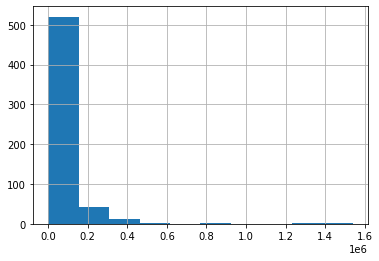

In [20]:
df_merged['Salary'].hist()

<AxesSubplot:>

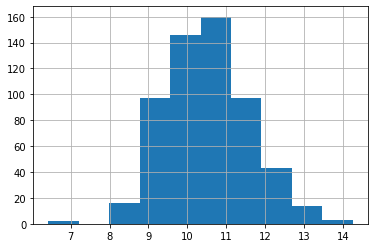

In [21]:
np.log(df_merged['Salary']).hist()

Dado que el Salario distribuye Log-Normal (supuesto altamente probable según la distribución anterior), simplemente se le aplicará el escalamiento logaritmico.

In [22]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [23]:
preprocessing = ColumnTransformer(
    transformers = [
        ('MinMaxScaler', MinMaxScaler(), [
            'Age'
        ]),
        
        ('OneHotEncoder', OneHotEncoder(), [
            'Preffered_Foot', 'Work_Rate', 
        ]),
        
        ('StandardScaler', StandardScaler(), [
            'Height', 'Weight', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking',
            'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
            'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina',
            'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots',
            'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'Salary'
        ])
    ]
)


pipe1 = Pipeline(steps = [
    ('prepro', preprocessing),
    ('model', Ridge())
])

pipe2 = Pipeline(steps = [
    ('prepro', preprocessing),
    ('model', SVR())
])

pipe3 = Pipeline(steps = [
    ('prepro', preprocessing),
    ('model', RandomForestRegressor())
])

In [24]:
y_new = np.log(df_merged['Salary'])

X_train, X_test, y_train, y_test = train_test_split(
    df_merged.drop(['Name', 'Nationality', 'National_Position', 'Club_Labeled'], axis=1),
    y_new,
    shuffle = True,
    test_size = 0.4,
    random_state = 0
)

pipelines = {'Ridge': pipe1,
            'SVR': pipe2,
            'RF': pipe3
            }

for name, model in pipelines.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores = np.round(r2_score(y_test, y_pred),2)
    mse = np.round(mean_squared_error(y_test, y_pred), 2)
    print(f'Para el modelo {name} el R2 es el siguiente:\n',scores)
    print(f'Para el modelo {name} el MSE es el siguiente:\n',mse, '\n')

Para el modelo Ridge el R2 es el siguiente:
 0.61
Para el modelo Ridge el MSE es el siguiente:
 0.45 

Para el modelo SVR el R2 es el siguiente:
 0.73
Para el modelo SVR el MSE es el siguiente:
 0.31 

Para el modelo RF el R2 es el siguiente:
 0.98
Para el modelo RF el MSE es el siguiente:
 0.02 



Respuesta:

Se implementaron 3 modelos en su estado más básico para predecir el Log del salario, de esa forma la variable dependiente distribuye normal lo que ayuda bastante a cumplir ciertos supuestos de normalidad de los modelos.

Aunque todos los R2 son mayores a 0.35, vale destacar que Random Forest Regressor tiene un R2 de 0.99 (casi perfecto), por lo que no hay mucha opciones de mejora que pudieran llevar al modelo a un R2 con valor 1.

Una posible razón de los buenos resultados es que la variable Y es Normal y que ayuda al correcto entrenamiento de los modelos.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>